In [62]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import PandasTools
import csv
import pandas as pd

In [6]:
with open('chembl_dopamin_d2_rp_ki.csv', "r") as f:
    reader = csv.DictReader(f, delimiter=";")
    ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m["Smiles"])
        val = m["pChEMBL Value"]
        if not val:
            val = -1
        mol.SetDoubleProp("pChEMBL", float(val))
        ligands.append(mol)
        
    
supplier = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supplier if m!=None]

print(len(ligands))
print(len(drugbank))

RDKit ERROR: [08:55:11] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:55:11] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [08:55:11] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [08:55:11] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [08:55:11] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [08:55:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:55:12] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [08:55:12] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [08:55:12] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [08:55:12] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [08:55:12] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [08:55:12] Can't kek

10473
7113


RDKit ERROR: [08:55:13] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [08:55:14] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [08:55:14] ERROR: Could not sanitize molecule ending on line 1151592


Funkce pro zisk scaffoldu, podle cvičení.

In [25]:
def getScaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    try:
        res = MurckoScaffold.MakeScaffoldGeneric(mol)
    except:
        return None
    return MurckoScaffold.GetScaffoldForMol(res)

Zkouška funkce na mém oblíbeném ligandu.

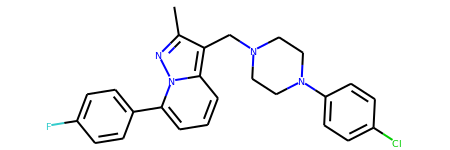

In [209]:
ligands[42]

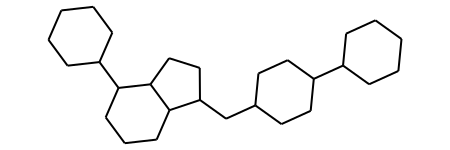

In [19]:
getScaffold(ligands[42])

Funkce která vytvoří dataframe se scaffoldy a příslušným smilesem.

In [133]:
def scaffoldize(mols):
    scaffolds = [getScaffold(m) for m in mols if getScaffold(m)]
    scaffold_smiles = [(i,Chem.MolToSmiles(s)) for i, s in enumerate(scaffolds) if s]
    ss = list(map(list, zip(*scaffold_smiles)))
    d = {"scaffold": scaffolds, "smiles": ss[1]}
    data = pd.DataFrame(d, index = ss[0] )
    #PandasTools.AddMoleculeColumnToFrame(data, smilesCol="smiles")
    return data

RDKit ERROR: [15:59:35] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [15:59:35] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [15:59:36] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [15:59:38] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [15:59:38] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [15:59:39] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [15:59:40] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [15:59:40] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [15:59:40] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [15:59:40] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [15:59:40] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [15:59:41] Explicit valence for atom # 2

,scaffold,smiles
0,,C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CC...
1,,C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2...
2,,C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CC...
3,,C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCC...
4,,C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1

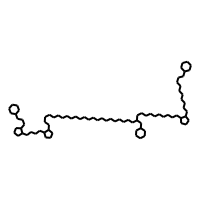
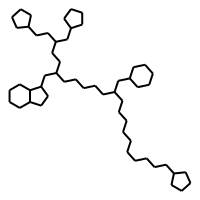
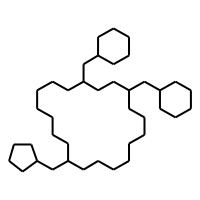
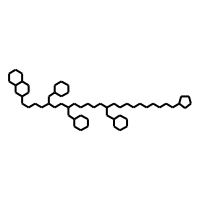
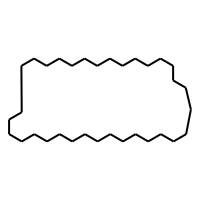

In [134]:
db_data = scaffoldize(drugbank)
db_data.head()

Vytvoření series s počtem zastoupení jednotlivých smilesů.

In [93]:
scaffold_distr = db_data["smiles"].value_counts()
scaffold_distr
#index - scaffold_distr.index[0]
#hodnota - scaffold_distr[0]

C1CCCCC1                                                                       1039
                                                                                976
C1CCC2CCCC2C1                                                                   192
C1CCCC1                                                                         188
C1CCC(CC2CCCCC2)CC1                                                             182
                                                                               ... 
C1CCC(CCC2CCC3CCC4CCCC4C23)CC1                                                    1
C1CCC(CC2CCC(CCC3CCCC4CCCCC43)C2)CC1                                              1
C1CCC(C2CCC(CC3CC4CCCCC4C3)CC2)CC1                                                1
C1CCC(CC2CCCC(CC3CCCC(CC4CCC5CC6CC(CC7CCCC(CC8CCCCC8)C7)CCC6CC5C4)C3)C2)CC1       1
C1CCCCC1.C1CCCCC1                                                                 1
Name: smiles, Length: 1545, dtype: int64

Obrázky prvních dvaceti nejčastějších scaffoldů v drugbank.

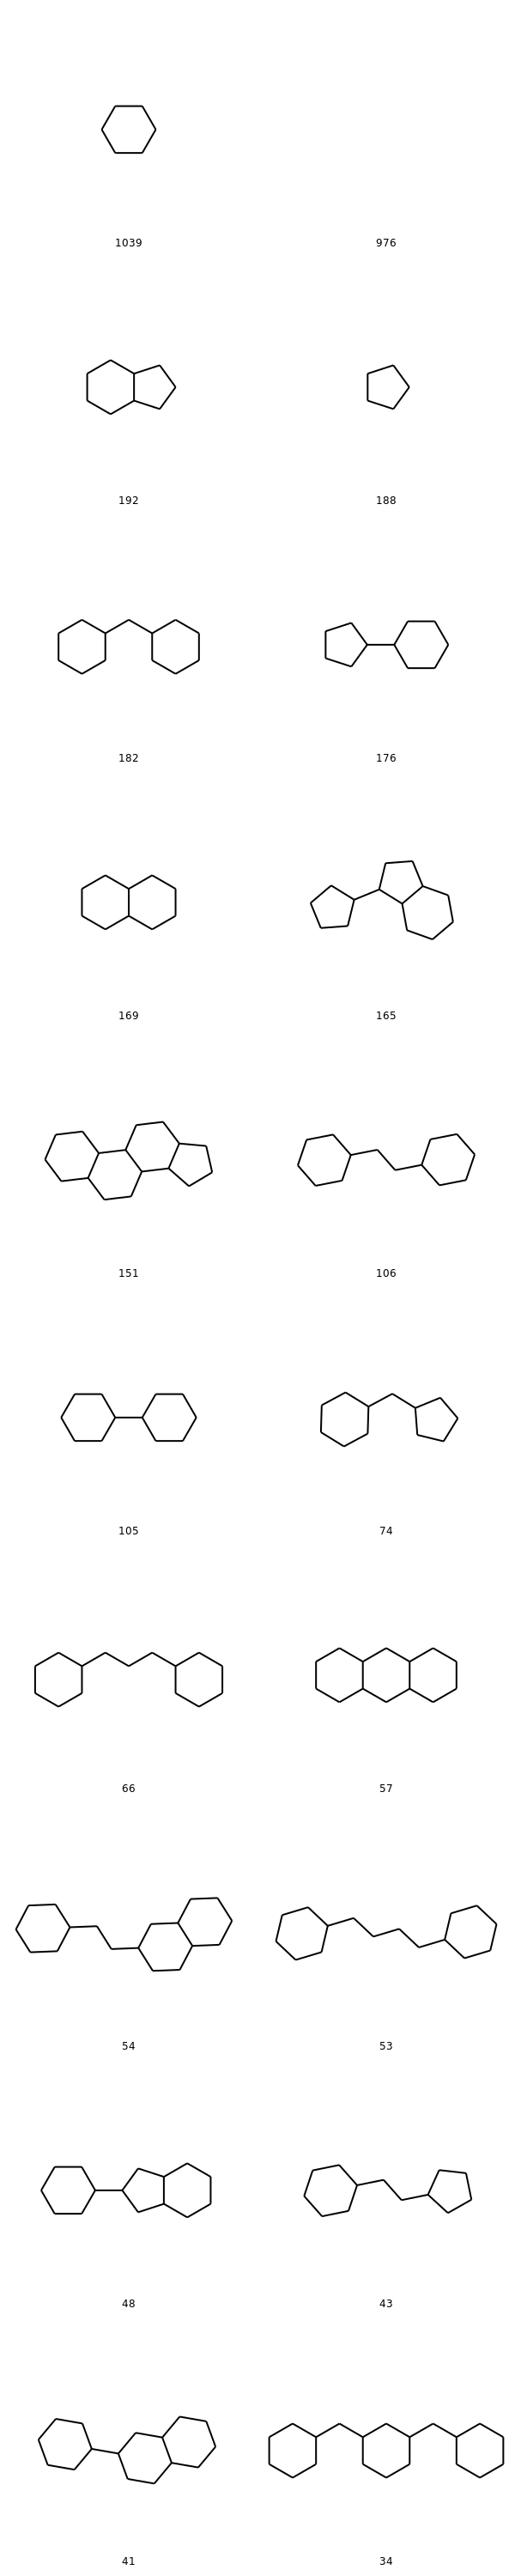

In [120]:
Draw.MolsToGridImage([Chem.MolFromSmiles(str(scaffold_distr.index[i])) for i in range(0,len(scaffold_distr[:20]))],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(s) for s in scaffold_distr[:20]])

To samé jen pro můj dataset.

RDKit ERROR: [13:00:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: no atoms
RDKit ERROR: Violation occurred on line 173 in file /home/conda/feedstock_root/build_artifacts/rdkit_1582368647484/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: getNumAtoms() > 0
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [13:32:11] Explicit valence for atom # 23 C, 6, is greater than permitted
RDKit ERROR: [13:32:11] Explicit valence for atom # 24 C, 6, is greater than permitted
RDKit ERROR: [13:32:11] Explicit valence for atom # 23 C, 6, is greater than permitted
RDKit ERROR: [13:32:14] Explicit valence for atom # 24 C, 6, is greater than permitted
RDKit ERROR: [13:32:17] Explicit valence for atom # 23 C, 6, is greater than permitted
RDKit ERROR: [13:32:18] Explicit valence for atom # 24 C, 6, is greater than permitted


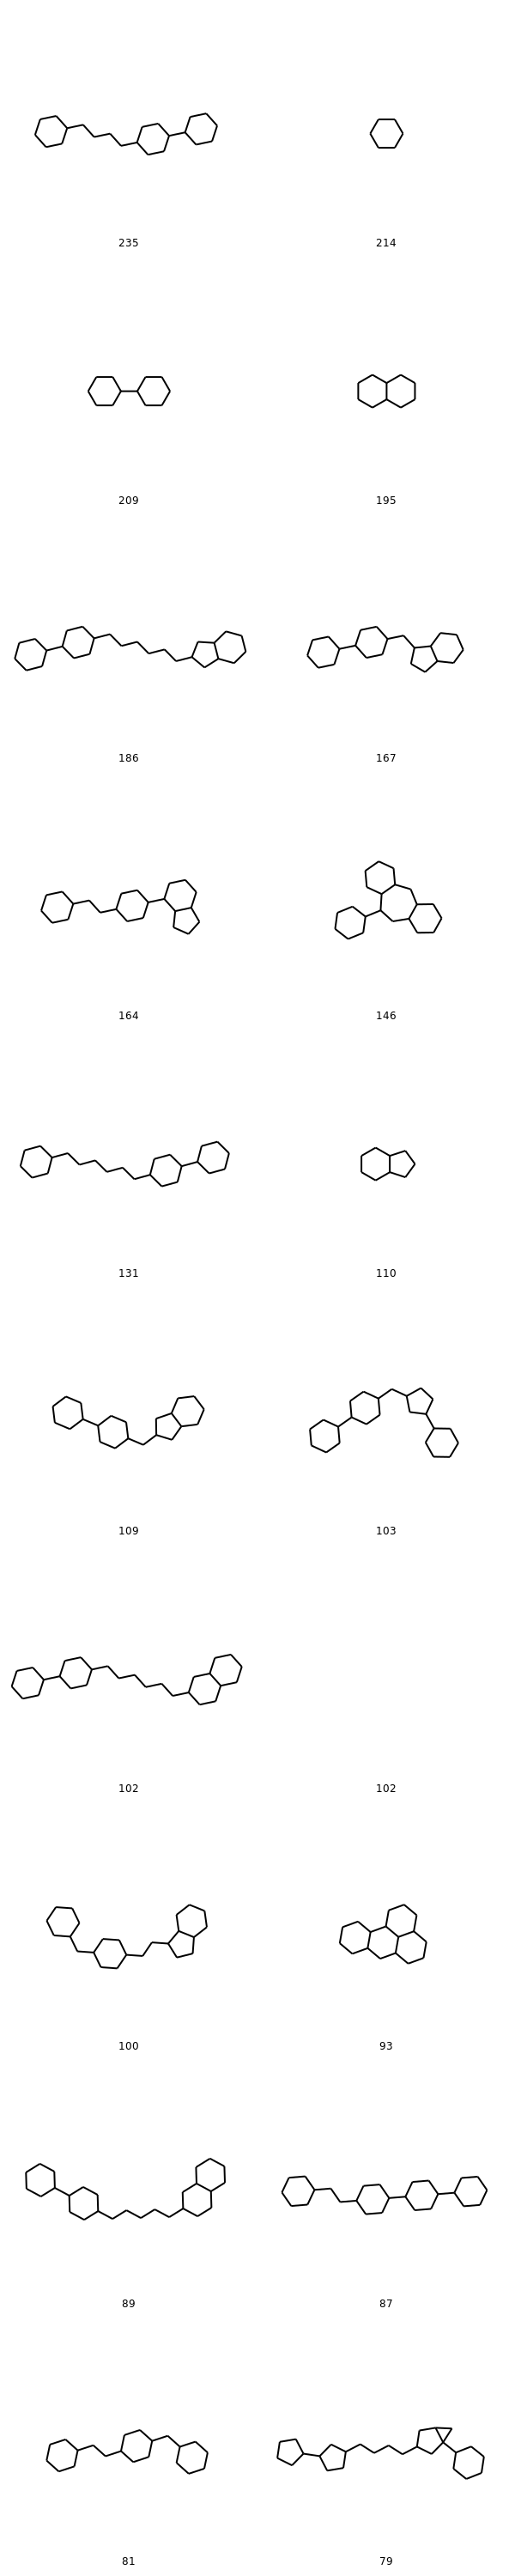

In [121]:
d2_data = scaffoldize(ligands)
d2_scaffold_distr = d2_data["smiles"].value_counts()
Draw.MolsToGridImage([Chem.MolFromSmiles(str(d2_scaffold_distr.index[i])) for i in range(0,len(d2_scaffold_distr[:20]))],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(s) for s in d2_scaffold_distr[:20]])

Oproti drugbank jsou nejčastější scaffoldy v d2d větší. Po většinu času jsou to 4 kruhy lineárně propojené. D2D ale obsahuje i molekuly s jednoduššími scaffoldy, které jsou časté i v drugbanku. Nepřijdou mně zdaleka tak rozmanité jako mtor ligandy.

Pro diversity picking jsem trochu upravila funkci scaffoldize tak aby obsahovala pchembl a já mohla následně ke každému scaffoldu vykreslit i zástupce s nejvyšším pchembl.

In [160]:
def ligand_scaffoldize(mols):
    _index = []
    scaffolds = []
    scaffold_smiles = []
    pchembl = []
    for i, m in enumerate(mols):
        s = getScaffold(m)
        if s:            
            scaffolds.append(s)
            scaffold_smiles.append(Chem.MolToSmiles(s))
            pchembl.append(m.GetProp('pChEMBL'))
            _index.append(i)
    d = {"scaffold": scaffolds, "smiles": scaffold_smiles, "pchembl": pchembl}
    data = pd.DataFrame(d, index = _index)#
    #PandasTools.AddMoleculeColumnToFrame(data, smilesCol="smiles")
    return data

RDKit ERROR: [16:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: no atoms
RDKit ERROR: Violation occurred on line 173 in file /home/conda/feedstock_root/build_artifacts/rdkit_1582368647484/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: getNumAtoms() > 0
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: no atoms
RDKit ERROR: Violation occurred on line 173 in file /home/conda/feedstock_root/build_artifacts/rdkit_1582368647484/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: getNumAtoms() > 0
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [16:28:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: no atoms
RDKit ERROR: Violation occurred on line 173 in file /home/conda/feedstock_root/build_artifacts/rdkit_1582368647484/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: getNumAtoms() > 0
RDKit 

,scaffold,smiles,pchembl
0,,C1CCC(C2CCCCC2)CC1,5.7000000000000002
1,,C1CCC2CCCC2C1,7.6799999999999997
2,,C1CCC2CCCC2C1,5.2000000000000002
3,,C1CCC(C2CCC(CC3CCC4CCCCC4C3)CC2)CC1,6.54
4,,C(CCCC1CCC(C2CCCCC2)CC1)CCC1CCCCC1,7.5199999999999996

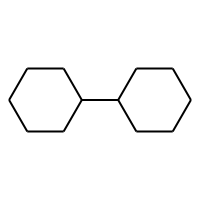
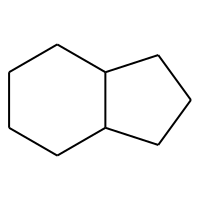
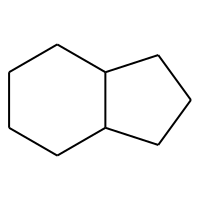
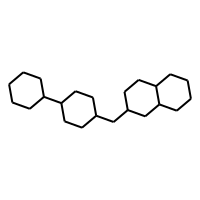
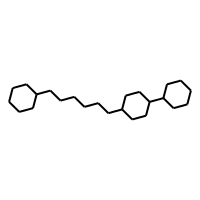

In [161]:
d2_expanded_data = ligand_scaffoldize(ligands)
d2_expanded_data.head()


Data sgroupuji přes smilesy - následně pro každý z nejzastoupenějších scaffoldů najdu podle smilsu odpovídající groupu a molekulu s nejvyšším pchembl. Dělám to jen pro prvních 20 nejzastoupenějších molekul, z vykreslovacích důvodů. 

In [162]:
expanded_groups = d2_expanded_data.groupby("smiles")

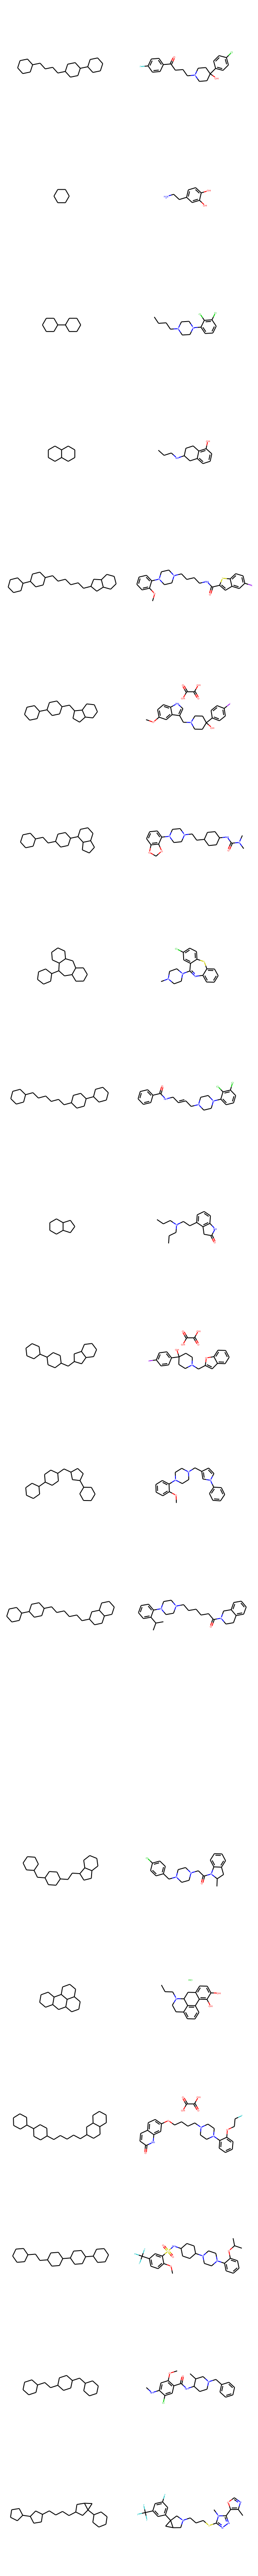

In [213]:
mols_to_vis = []
vis = []
for i in range(0,len(d2_scaffold_distr[:20])):
    vis.append(Chem.MolFromSmiles(str(d2_scaffold_distr.index[i])))
    g = expanded_groups.get_group(d2_scaffold_distr.index[i])
    j = g["pchembl"].astype(float).argmax()
    vis.append(ligands[g.index[j]])
Draw.MolsToGridImage(vis, molsPerRow=2, subImgSize=(300,300))